In [24]:
#import packages
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
#load data
# file = 'chirps_full_WA.nc'
# data = xr.open_dataset(file)
data = xr.open_dataset('chirps_full_WA.nc')
data = data['precip'].where(data['precip']!=-99)

# data1= xr.open_dataset('GPCC_data2.nc')
# data1 = data1['precip'].where(data1['precip']!=-99)

In [28]:
# data

In [29]:
# CHIRPS = pd.DataFrame(data)
# GPCC = pd.DataFrame(data1)

In [30]:
#extracting data for part of the Guinenean zone
#GBZ is Guinean Baroclinic Zone
CHIRPS = data.sel(latitude=slice(4,8),longitude=slice(-18,18))
GPCC =  data1.sel(lat=slice(4,8),lon=slice(-18,18))

In [31]:
doy_data = CHIRPS.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_data1 = GPCC.mean(['lon','lat']).groupby('time.dayofyear')

In [32]:
# GBZ_CHIRPS = CHIRPS.ravel()
# GBZ_GPCC = GBZ_GPCC.ravel()

# Calculate Pearson correlation coefficient and p-value
# correlation_coefficient, p_value = stats.pearsonr(CHIRPS, GPCC)

# print("Pearson correlation coefficient:", correlation_coefficient)
# print("Two-tailed p-value:", p_value)

In [33]:
#Function for Anomaly Computation & Data Check for inf values
def ano(x,dim):
    return (x-x.mean(dim=dim))

def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] = np.nan
    return p

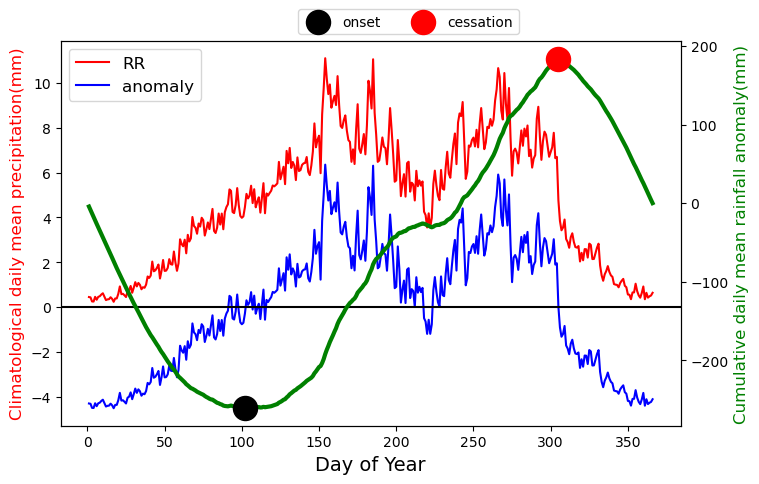

In [34]:
x = list(doy_data.groups.copy())
fig, ax = plt.subplots(figsize=(8,5))

avg_data = inf_check(doy_data.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

ax.set_xlabel('Day of Year', fontsize=14)


ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


ax1 = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe
            

#Onset and Cessation Detection                 
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

# for i in range(dx, len(anomaly) - dx):
#     if np.min(anomaly[i - dx:i + dx]) == anomaly[i]:
#         onset.append([i + 1, anomaly[i + 1]])

#     if np.max(anomaly[i - dx:i + dx]) == anomaly[i]:
#         cessation.append([i + 1, anomaly[i + 1]])

ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      
fig.savefig('Guinean_zone')
                

In [ ]:
onset[0]

In [ ]:
# onset[1]

In [ ]:
cessation[0]

In [ ]:
# cessation[1]

In [ ]:
yearly_data = GBZ.mean(['longitude','latitude']).groupby('time.year')
yearly_data 

In [ ]:
count = 0
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(30,26))#, sharex = True, sharey=True)
fig.suptitle('Onset and Cessation for Each Year', fontsize=50)
fig.text(0.05, 0.5, 'Climatological daily mean precipitation (mm)', va='center', rotation='vertical',fontsize=50, color='r')
fig.text(0.94, 0.5, 'Cumulative daily mean rainfall anomaly(mm)', va='center', rotation='vertical', fontsize=50, color='g')
fig.text(0.5, 0.04, 'Day of Year', ha='center', fontsize=50)
plt.subplots_adjust(wspace=0.5, hspace=1)


for y, ax in zip(yearly_data,axes.flatten()):
#     ax = axes[count // 5, count % 5]  # Access the appropriate subplot based on count

    year = y[0]  #Extract the year from the data
    y1 = y[1].groupby('time.dayofyear').sum('time')
    x = y1.dayofyear
    #x = list(doy_data91.groups.copy())

    avg_data = inf_check(y1, grid=True)
    avg_data.plot(ax=ax, color='r')#, label='RR')
    ano(avg_data, dim="dayofyear").plot(ax=ax, color='b')#, label='anomaly')

    # Legend
    ax.legend(loc='upper left', fontsize=12)
#     ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12)
#     ax.set_xlabel('Day of Year', fontsize=14)
    ax.axhline(y=0, color='k')  # Horizontal black line at the zero mark

    ax1 = ax.twinx()
    anom = ano(avg_data, dim='dayofyear').cumsum()
    ax1.plot(x, anom, color='g', linewidth=3)
#     ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')  # Set label

    # Onset and Cessation Detection
    anomaly = anom.values
    dx = 28  # Detection window (we use a nearly monthly interval to avoid multiple mid-month false onset)
    onset = []
    cessation = []
    for i in range(dx, len(anomaly) - dx):
        if np.min(anomaly[i - dx:i + dx]) == anomaly[i]:
            onset.append([i + 1, anomaly[i + 1]])
        if np.max(anomaly[i - dx:i + dx]) == anomaly[i]:
            cessation.append([i + 1, anomaly[i + 1]])

    ax1.scatter(np.copy(onset).T[0], np.copy(onset).T[1], 300, color='k', zorder=5)
    ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5) #label='cessation')
    ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
    
    ax.set_title(str(year))  # Set the subplot title as the year

    
    count += 1
# filterwarnings('ignore')    

plt.show
fig.savefig('Guinean_zone_yearly')


In [ ]:
# for y, ax in zip(yearly_data,axes.flatten()):
#     print(y)


count = 0
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12, 8))
fig.suptitle('Onset and Cessation for Each Year', fontsize=20)
fig.text(0, 0.5, 'Climatological daily mean precipitation (mm)', va='center', rotation='vertical', fontsize=20, color='r')
fig.text(1, 0.5, 'Cumulative daily mean rainfall anomaly (mm)', va='center', rotation='vertical', fontsize=20, color='g')
fig.text(0.5, 0.04, 'Day of Year', ha='center', fontsize=20)

plt.subplots_adjust(wspace=0.5, hspace=1)

for y, ax in zip(yearly_data, axes.flatten()):
    year = y[0]  # Extract the year from the data
    y1 = y[1].groupby('time.dayofyear').sum('time')
    x = y1.dayofyear

    avg_data = inf_check(y1, grid=True)
    avg_data.plot(ax=ax, color='r')
    ano(avg_data, dim="dayofyear").plot(ax=ax, color='b')

    ax.legend(loc='upper left', fontsize=12)
    ax.axhline(y=0, color='k')

    ax1 = ax.twinx()
    anom = ano(avg_data, dim='dayofyear').cumsum()
    ax1.plot(x, anom, color='g', linewidth=3)

    anomaly = anom.values
    dx = 28
    onset = []
    cessation = []
    for i in range(dx, len(anomaly) - dx):
        if np.min(anomaly[i - dx:i + dx]) == anomaly[i]:
            onset.append([i + 1, anomaly[i + 1]])
        if np.max(anomaly[i - dx:i + dx]) == anomaly[i]:
            cessation.append([i + 1, anomaly[i + 1]])

    ax1.scatter(np.copy(onset).T[0], np.copy(onset).T[1], 300, color='k', zorder=5)
    ax1.scatter(np.copy(cessation).T[0], np.copy(cessation).T[1], 300, color='r', zorder=5)
    ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))

    ax.set_title(str(year))  # Set the subplot title as the year

    count += 1

plt.show()